In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:
## implementar a função que identifica a bandeira
## a função deve receber uma imagem e retornar a bandeira identificada
## a função deve retornar uma lista de tuplas, onde cada tupla contém as coordenadas de um dos cantos da bandeira
## [(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),(PAIS, (x1, y2), (x2, y2)`),...]

def identifica_bandeira(img):
    # Sua implementação deve começar aqui

    # quando implemenar a função, remova o pass
    pass



In [33]:
## nao alterar essa função
# Função para desenhar as bandeiras identificadas
def draw_bandeiras(lista_bandeiras, bgr):
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], bandeira[1], cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        return bgr

In [ ]:
## Para testar a função identifica_bandeira

# Você pode testar a função identifica_bandeira com as imagens de teste fornecidas
# 
img = cv2.imread('img/teste1.png')
# img = cv2.imread('img/teste2.png')
# img = cv2.imread('img/teste3.png')
# img = cv2.imread('img/teste4.png')

# Chamar a função identifica_bandeira
resultado = identifica_bandeira(img)

# Imprimir o resultado da função identifica_bandeira 
print(resultado)

# Desenhar as bandeiras na imagem
bgr = draw_bandeiras(resultado, img)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.show()




Bandeiras detectadas: [('Singapura', (192, 496), (457, 673)), ('monaco', (726, 163), (984, 369)), ('Peru', (119, 121), (381, 296))]


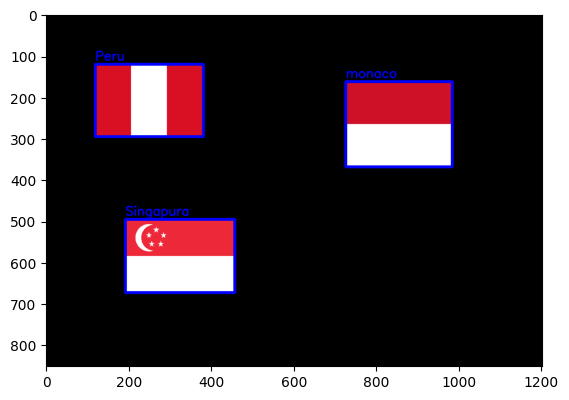

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bandeiras(lista_bandeiras, bgr):
    """Desenha retângulos e nomes das bandeiras detectadas na imagem."""
    try:
        for bandeira in lista_bandeiras:
            cv2.rectangle(bgr, bandeira[1], bandeira[2], (255, 0, 0), 5)
            cv2.putText(bgr, bandeira[0], (bandeira[1][0], bandeira[1][1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        return bgr
    except Exception as e:
        print("Erro ao desenhar bandeiras:", e)
        return bgr

def identifica_bandeira(img):
    if img is None:
        print("Erro: Imagem não carregada. Verifique o caminho do arquivo.")
        return []

    resultado = []

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Faixas de cor para vermelho e branco
    faixa_vermelho1 = (0, 100, 50), (10, 255, 255)
    faixa_vermelho2 = (170, 100, 50), (180, 255, 255)
    faixa_branco = (0, 0, 200), (180, 50, 255)

    mascara_vermelho1 = cv2.inRange(hsv, np.array(faixa_vermelho1[0]), np.array(faixa_vermelho1[1]))
    mascara_vermelho2 = cv2.inRange(hsv, np.array(faixa_vermelho2[0]), np.array(faixa_vermelho2[1]))
    mascara_vermelho = cv2.bitwise_or(mascara_vermelho1, mascara_vermelho2)
    mascara_branco = cv2.inRange(hsv, np.array(faixa_branco[0]), np.array(faixa_branco[1]))

    # Combinar as máscaras de vermelho e branco em um único "objeto"
    mascara_combinada = cv2.bitwise_or(mascara_vermelho, mascara_branco)

    # Encontrar contornos na máscara combinada
    contornos, _ = cv2.findContours(mascara_combinada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contorno in contornos:
        x, y, w, h = cv2.boundingRect(contorno)
        if w > 50 and h > 30:  # Filtrar objetos pequenos
            # Criar uma máscara para o contorno
            mascara_objeto = np.zeros_like(mascara_combinada)
            cv2.drawContours(mascara_objeto, [contorno], -1, 255, thickness=cv2.FILLED)

            # Calcular a área de vermelho e branco dentro do contorno
            area_vermelho = cv2.bitwise_and(mascara_vermelho, mascara_objeto)
            area_branco = cv2.bitwise_and(mascara_branco, mascara_objeto)

            # Contar o número de pixels vermelhos e brancos
            vermelho_pixels = cv2.countNonZero(area_vermelho)
            branco_pixels = cv2.countNonZero(area_branco)

            total_pixels = vermelho_pixels + branco_pixels

            if total_pixels > 0:  # Se houver algum pixel vermelho ou branco
                # Calcular a proporção de branco e vermelho
                proporcao_branco = branco_pixels / total_pixels
                proporcao_vermelho = vermelho_pixels / total_pixels

                # Usar a proporção de branco e vermelho para identificar a bandeira
                if proporcao_branco > 0.5:  # Maioria de branco (Singapura)
                    resultado.append(("Singapura", (x, y), (x + w, y + h)))  
                elif proporcao_branco == 0.5:  # Metade branco (Mônaco)
                    resultado.append(("monaco", (x, y), (x + w, y + h)))  
                else:  # Maioria de vermelho (Singapura)
                    resultado.append(("Peru", (x, y), (x + w, y + h)))  

    return resultado

def main(): 
    # Carregar a imagem de teste
    img = cv2.imread('img/teste1.png')
    
    if img is None:
        print("Caminho da imagme errado")
        return
    
    # Chamar a função identifica_bandeira
    resultado = identifica_bandeira(img)

    # Imprimir o resultado
    print("Bandeiras detectadas:", resultado)

    # Desenhar as bandeiras na imagem
    bgr = draw_bandeiras(resultado, img)
    
    # Mostrar a imagem resultante
    plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
    plt.show()

if __name__ == "__main__":
    main()